<a href="https://colab.research.google.com/github/Vane07R/Programacion-III/blob/main/FashionMinist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IMPORTAR LIBRERIAS
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow_datasets as tfds

In [2]:
#IMPORTAR Y CARGAR NUESTRO DATASET FASHIONMINIST
dataset, metedata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
dataTrain, dataTest = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteAFICU0/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteAFICU0/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
#CREAR ETIQUETAS
tags = ["Top", "Pantalón", "Sueter", "Vestido", "Abrigo", "Sandalia", "Camisa", "Zapatilla", "Bolso", "Bota"]

In [4]:
#PASAR EN VARIABLES LOS DATOS 
numTraint = metedata.splits["train"].num_examples
numTest = metedata.splits["test"].num_examples
print(numTraint, numTest)

60000 10000


In [5]:
#FUNCION NORMALIZADORA DE LOS PIXELES
def normalizacion(imgs, lbls):
  imgs = tf.cast(imgs, tf.float32)
  imgs /= 255
  return imgs, lbls

In [6]:
#LLAMAR LA FUNCION NORMALIZADORA Y COMPRIMIR DATOS
dataTrain = dataTrain.map(normalizacion)
dataTest = dataTest.map(normalizacion)

In [7]:
#ESTRUCTURAR Y CREAR LA RED NEURONAL
modelo = tf.keras.Sequential([
         tf.keras.layers.Flatten(input_shape=(28,28,1)), #capa de entrada de 28*28 = 784 neuronas una para cada pixel
         tf.keras.layers.Dense(80, activation=tf.nn.relu), #capa oculta con 80 neuronas, funcion de activacion relu
         tf.keras.layers.Dense(80, activation=tf.nn.relu), # capa oculta con 80 neuronas, funcion de activacion relu
         tf.keras.layers.Dense(10, activation=tf.nn.softmax) # capa de salida con 10 neuronas, funcion de activacion sofmax. esta funcion es requerida para clasificacion            
])

In [8]:
#COMPILAMOS E INDICAMOS LAS FUNCIONES A UTILIZAR 
modelo.compile(
    optimizer= "adam",
    loss= "sparse_categorical_crossentropy",
    metrics= ['accuracy']
)

In [9]:
batchsize = 32
dataTrain = dataTrain.repeat().shuffle(numTraint).batch(batchsize)
dataTest = dataTest.repeat().shuffle(numTest).batch(batchsize)

In [10]:
#ENTRENAR EL MODELO
modelo.fit(dataTrain, epochs=10, steps_per_epoch=math.ceil(numTraint/batchsize), verbose=2)

Epoch 1/10
1875/1875 - 14s - loss: 0.4996 - accuracy: 0.8227
Epoch 2/10
1875/1875 - 6s - loss: 0.3714 - accuracy: 0.8649
Epoch 3/10
1875/1875 - 6s - loss: 0.3360 - accuracy: 0.8757
Epoch 4/10
1875/1875 - 5s - loss: 0.3158 - accuracy: 0.8833
Epoch 5/10
1875/1875 - 5s - loss: 0.2970 - accuracy: 0.8903
Epoch 6/10
1875/1875 - 6s - loss: 0.2811 - accuracy: 0.8944
Epoch 7/10
1875/1875 - 5s - loss: 0.2672 - accuracy: 0.8996
Epoch 8/10
1875/1875 - 6s - loss: 0.2643 - accuracy: 0.9006
Epoch 9/10
1875/1875 - 6s - loss: 0.2513 - accuracy: 0.9057
Epoch 10/10
1875/1875 - 6s - loss: 0.2405 - accuracy: 0.9087


In [11]:
#EVALUAR NUESTRO MODELO Y EL MARGEN DE ERROR 
perFail, accuracy = modelo.evaluate(dataTest, steps=math.ceil(numTest/batchsize))
print("Falla en ", perFail, ', y acierta en ', accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.3332 - accuracy: 0.8822
Falla en  0.3331804573535919 , y acierta en  0.8821884989738464


In [12]:
#GRAFICAR LA IMAGEN 
def grafImgagen(prdArray, trueLabels, img):
  prdArray, trueLabels, img = prdArray[i], trueLabels[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  lblPrd = np.argmax(prdArray)
  if lblPrd == trueLabels:
    color = "#027050"
  else:
    color = "#E61299"
  
  plt.xlabel("Predict: {}".format(tags[lblPrd]), color=color)

In [13]:
#CONVERTIR LAS IMAGENES EN ARRAYS
for imgTest, tagTest in dataTest.take(1):
  imgTest = imgTest.numpy()
  tagTest = tagTest.numpy()
  prd = modelo.predict(imgTest)

In [14]:
#GRAFICAR 
def grafiMatriz(prdMatriz, trueTag):
  prdMatriz, trueTag = prdMatriz[i], trueTag[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.ylim([0,1])
  thisPlot = plt.bar(range(10), prdMatriz, color='#9CC8BB')
  prdTag = np.argmax(prdMatriz)

  thisPlot[prdTag].set_color("#E61299")
  thisPlot[trueTag].set_color("#4AE3AB")


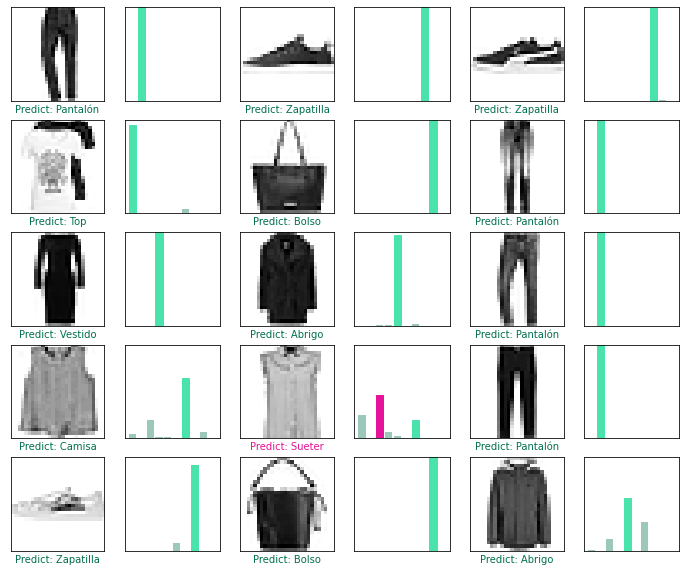

In [15]:
#RECORRER IMAGENES A GRAFICAR 
rows = 5
columns = 3
numImg = rows*columns

plt.figure(figsize=(2*2*columns, 2*rows))

for i in range(numImg):
  plt.subplot(rows, 2*columns, 2*i+1)
  grafImgagen(prd, tagTest, imgTest)

  plt.subplot(rows, 2*columns, 2*i+2)
  grafiMatriz(prd, tagTest)

plt.rcParams['font.size'] = 14
plt.show()

In [16]:
import cv2
#AGREGAR LA IMAGEN
imgLocal = cv2.imread('/content/bolso.png', 0)
imgLocal = tf.cast(imgLocal, tf.float32)
imgLocal = imgLocal / 255
imgLocal = np.expand_dims(imgLocal, axis=0)

print(imgLocal.shape)

(1, 28, 28)


In [17]:
#ENTRENAR
PrdLocal = modelo.predict(imgLocal, batch_size=1)
tagLocalTest = np.argmax(PrdLocal)
print(PrdLocal)

[[3.8994581e-03 3.2345125e-07 2.5083960e-04 2.7040488e-04 3.1595253e-03
  2.5609294e-03 6.3568878e-04 1.0405935e-03 9.8817456e-01 7.6899341e-06]]


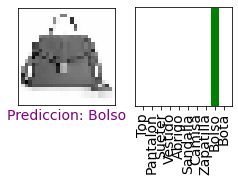

In [18]:
#IMPRIMIR LOS RESULTADOS
columns = 2
rows = 2

plt.figure(figsize=(2*2*columns, 2*rows))
plt.subplot(rows, 2*columns, 2*0+1)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(imgLocal[0,...], cmap=plt.cm.binary)
# plt.colorbar()
plt.xlabel("Prediccion: {}".format(tags[tagLocalTest]), color='purple')

plt.subplot(rows, 2*columns, 2*0+2)
plt.grid(False)
plt.xticks([])
plt.yticks([])
thisplot = plt.bar(range(10), PrdLocal[0], color='#777777')
plt.ylim([0,1])
thisplot[tagLocalTest].set_color("red")
thisplot[tagLocalTest].set_color("green")
# plt.legend(prdFinal, title='Predicción', bbox_to_anchor=(1, 0, 0.5, 1), loc="center left")
plt.xticks(range(10), tags, rotation=90)

plt.rcParams['font.size'] = 14
plt.show()